In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import cholesky
from tqdm import tqdm
from max_k_cut_fj import solve_sdp_program, find_partition
from utils import load_gset_graph, generate_random_graph

In [2]:
k = 4
iters = 10000
# p = './benchmark/max_k_cut/G14'
# W = load_gset_graph(p)
n = 100
W = generate_random_graph(n)

In [3]:
RELAX = solve_sdp_program(W, k)

In [4]:
A = cholesky(RELAX)

In [5]:
sums = list()
for _ in tqdm(range(iters)):
    s = find_partition(A, W, k)
    sums.append(s)

100%|██████████| 10000/10000 [01:51<00:00, 89.37it/s]


In [6]:
max(sums)

2044.0

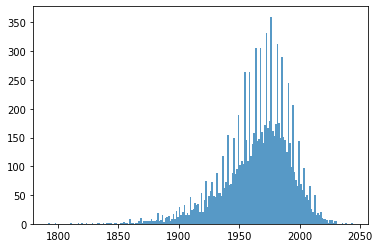

In [7]:
plt.hist(sums, len(list(set(sums))), alpha=0.75)
plt.show()